In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner
import tensorflow as tf
import spacy
import nltk

from keras import layers
from keras.metrics import Precision, Recall, F1Score
from keras.utils import to_categorical, pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Bidirectional, Dropout, Conv2D, MaxPooling2D, Input, Embedding, SimpleRNN, BatchNormalization
from keras.regularizers import l2, l1
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam, Adamax, Ftrl
from keras.constraints import max_norm
from keras.datasets import fashion_mnist, imdb
from keras.applications.vgg16 import VGG16

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [29]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    val_acc_values = history_dict['val_accuracy']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.style.use('dark_background')

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'ro', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='--')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'ro', label='Training acc')
    plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='--')

    plt.tight_layout()
    plt.show()

# Завантаження даних: 

In [30]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [31]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Створення моделей:

In [32]:
class MyRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            SimpleRNN(32, dropout=0.0, recurrent_dropout=0.1),
            BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid', kernel_constraint=max_norm(3.))
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics=["accuracy"])

        return model

In [33]:
class MyLSTMModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            LSTM(32, dropout=0.0, recurrent_dropout=0.1),
            BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics=["accuracy"])

        return model

In [143]:
class MyBRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            Bidirectional(LSTM(32, dropout=0.2)),
            # BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics=["accuracy"])

        return model

In [144]:
class MyDRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            LSTM(32, return_sequences=True, dropout=0.0, recurrent_dropout=0.1),
            LSTM(32, recurrent_dropout=0.1),
            # BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics=["accuracy"])

        return model

In [36]:
class MyDBRNNModel():
    def build(self):
        model = Sequential([
            Embedding(max_features, 32),
            Bidirectional(LSTM(32, return_sequences=True, dropout=0.0)),
            Bidirectional(LSTM(32, dropout=0.0)),
            BatchNormalization(),
            Flatten(),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer=RMSprop(),
                      loss='binary_crossentropy',
                      metrics=["accuracy"])

        return model

# Тренування та оцінка:

In [37]:
rnnmodel = MyRNNModel()
rnn_model = rnnmodel.build()

history = rnn_model.fit(input_train, y_train, epochs=8, batch_size=128, validation_split=0.25)

Epoch 1/8


147/147 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.6082 - loss: 0.6661 - val_accuracy: 0.7661 - val_loss: 0.5102
Epoch 2/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8647 - loss: 0.3209 - val_accuracy: 0.7178 - val_loss: 0.5626
Epoch 3/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9042 - loss: 0.2338 - val_accuracy: 0.8284 - val_loss: 0.3906
Epoch 4/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9547 - loss: 0.1328 - val_accuracy: 0.7892 - val_loss: 0.5553
Epoch 5/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9810 - loss: 0.0650 - val_accuracy: 0.8267 - val_loss: 0.5785
Epoch 6/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9938 - loss: 0.0261 - val_accuracy: 0.7928 - val_loss: 0.7198
Epoch 7/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9969 - loss: 0.0125 - val_accuracy: 0.8251 - val_loss: 0.7184
Epoch 8/8
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9986 - loss: 0.0066 - val_accuracy: 0.8012 - va

In [38]:
results = rnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7987 - loss: 0.9116
val_accuracy:0.7972745895385742


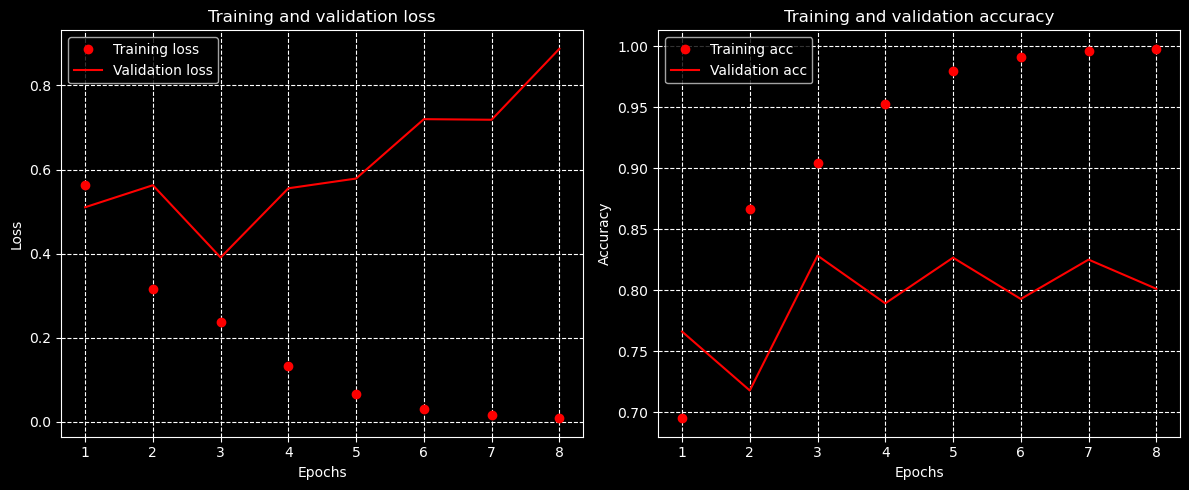

In [39]:
plot_history(history)

In [52]:
lstmmodel = MyLSTMModel()
lstm_model = lstmmodel.build()

history = lstm_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.25)

Epoch 1/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 58s 386ms/step - accuracy: 0.7056 - loss: 0.5416 - val_accuracy: 0.6805 - val_loss: 0.5653
Epoch 2/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 57s 390ms/step - accuracy: 0.8981 - loss: 0.2519 - val_accuracy: 0.8743 - val_loss: 0.3651
Epoch 3/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 56s 383ms/step - accuracy: 0.9322 - loss: 0.1824 - val_accuracy: 0.8737 - val_loss: 0.2974
Epoch 4/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 56s 383ms/step - accuracy: 0.9477 - loss: 0.1441 - val_accuracy: 0.8779 - val_loss: 0.3263
Epoch 5/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 56s 381ms/step - accuracy: 0.9603 - loss: 0.1151 - val_accuracy: 0.8612 - val_loss: 0.5227


In [41]:
results = lstm_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.8618 - loss: 0.3708
val_accuracy:0.8612532019615173


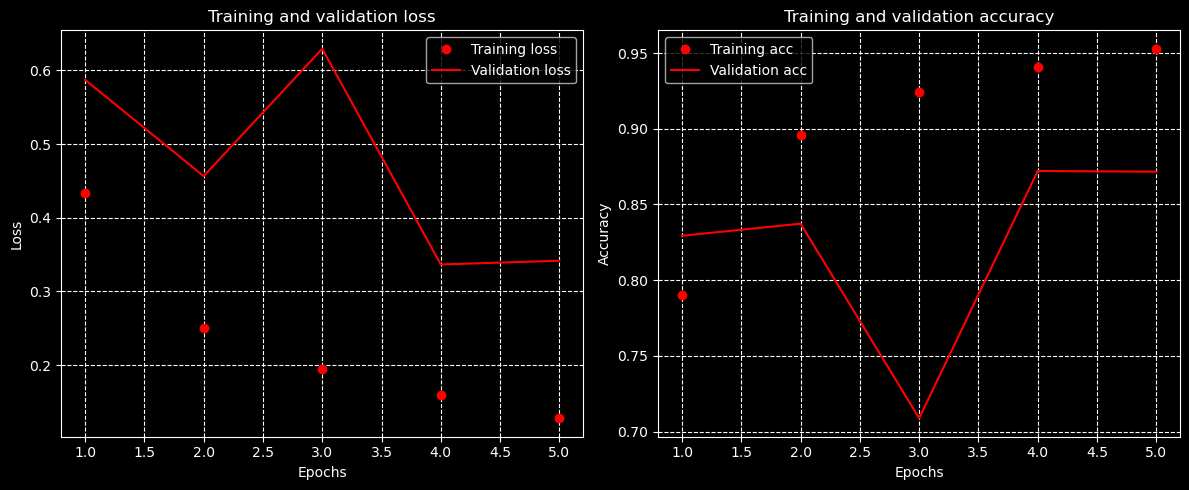

In [42]:
plot_history(history)

In [145]:
brnnmodel = MyBRNNModel()
brnn_model = brnnmodel.build()

history = brnn_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.25)

Epoch 1/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 107s 713ms/step - accuracy: 0.5357 - loss: 0.6838 - val_accuracy: 0.7803 - val_loss: 0.4994
Epoch 2/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 105s 715ms/step - accuracy: 0.7811 - loss: 0.4803 - val_accuracy: 0.8312 - val_loss: 0.3866
Epoch 3/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 110s 750ms/step - accuracy: 0.8523 - loss: 0.3597 - val_accuracy: 0.7907 - val_loss: 0.4493
Epoch 4/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 113s 767ms/step - accuracy: 0.8685 - loss: 0.3260 - val_accuracy: 0.8337 - val_loss: 0.3826
Epoch 5/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 114s 776ms/step - accuracy: 0.8872 - loss: 0.2821 - val_accuracy: 0.8708 - val_loss: 0.3388


In [146]:
results = brnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 [==============================] - 39s 50ms/step - loss: 0.3219 - accuracy: 0.8736
val_accuracy:0.8735600113868713


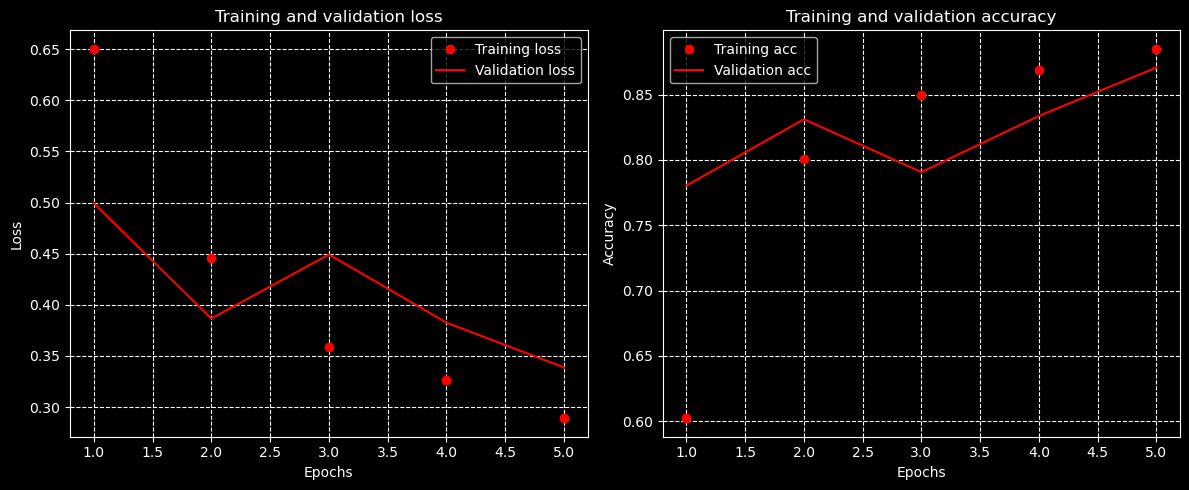

In [147]:
plot_history(history)

In [148]:
drnnmodel = MyDRNNModel()
drnn_model = drnnmodel.build()

history = drnn_model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.25)

Epoch 1/5
147/147 [==============================] - 168s 1s/step - loss: 0.6070 - accuracy: 0.6324 - val_loss: 0.4029 - val_accuracy: 0.8307
Epoch 2/5
147/147 [==============================] - 166s 1s/step - loss: 0.3645 - accuracy: 0.8474 - val_loss: 0.3198 - val_accuracy: 0.8691
Epoch 3/5
147/147 [==============================] - 166s 1s/step - loss: 0.2726 - accuracy: 0.8943 - val_loss: 0.3289 - val_accuracy: 0.8646
Epoch 4/5
147/147 [==============================] - 168s 1s/step - loss: 0.2285 - accuracy: 0.9145 - val_loss: 0.2894 - val_accuracy: 0.8795
Epoch 5/5
147/147 [==============================] - 167s 1s/step - loss: 0.1983 - accuracy: 0.9268 - val_loss: 0.3096 - val_accuracy: 0.8896


In [149]:
results = drnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 [==============================] - 86s 110ms/step - loss: 0.3392 - accuracy: 0.8785
val_accuracy:0.8785200119018555


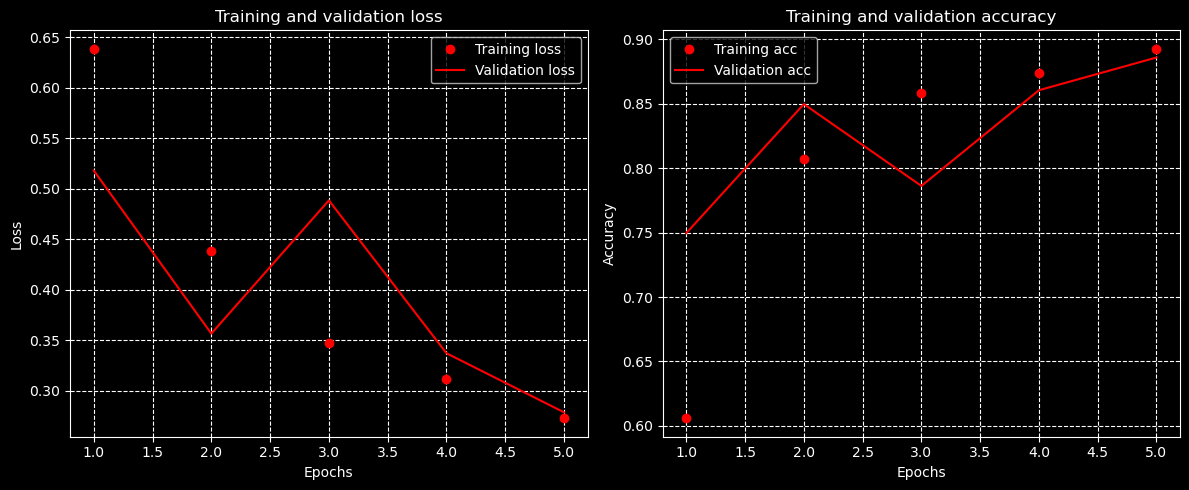

In [150]:
plot_history(history)

In [53]:
dbrnnmodel = MyDBRNNModel()
dbrnn_model =dbrnnmodel.build()

history = dbrnn_model.fit(input_train, y_train, epochs=4, batch_size=128, validation_split=0.25)

Epoch 1/4
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.7247 - loss: 0.5160 - val_accuracy: 0.5086 - val_loss: 0.6787
Epoch 2/4
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9036 - loss: 0.2463 - val_accuracy: 0.8802 - val_loss: 0.3613
Epoch 3/4
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9300 - loss: 0.1869 - val_accuracy: 0.8788 - val_loss: 0.2885
Epoch 4/4
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9486 - loss: 0.1361 - val_accuracy: 0.8568 - val_loss: 0.3405


In [54]:
results = dbrnn_model.evaluate(input_test, y_test)
print(f"val_accuracy:{results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8496 - loss: 0.3564
val_accuracy:0.8522218465805054


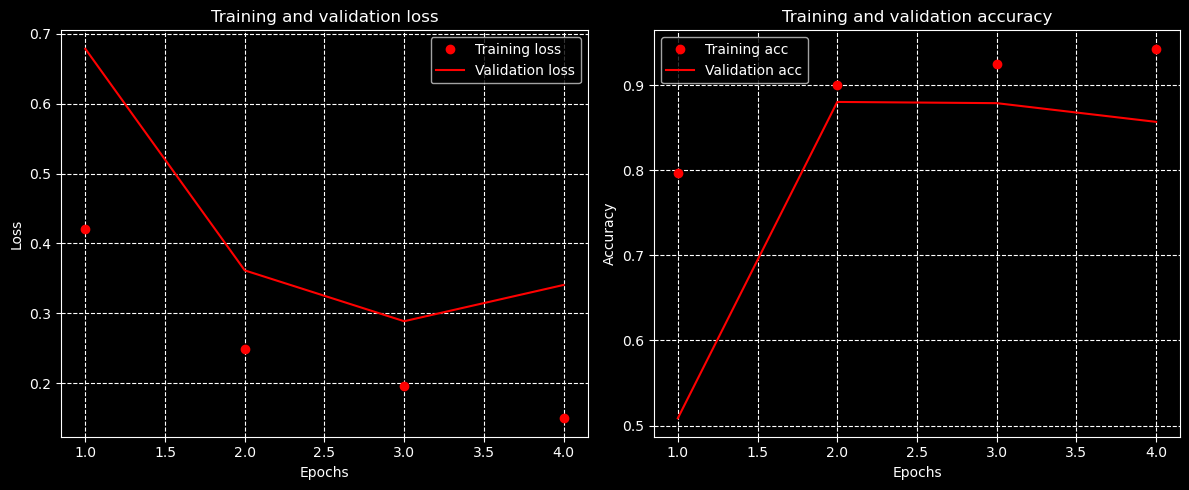

In [55]:
plot_history(history)

# Висновки:

Однозначно можу сказати що на конкретному датасеті великої різниці між моделями я не побачив. Всі моделі швидко перезавчалися. Змінюючи  dropout та recurrent_dropout зміг відтянути перенавчання на кілька епох, але це не принесло значного збільшення точності. Двостороння та глибока моделі чуть краше справились з цим датасетом, але збільшення їх глибени не принесли результату крім збільшення часу навчання в декілька разів.

In [ ]:
fvcxvvfdsffffdsvvvvcccvcvcvccvvvvv